# MRTS Dataset Buisnesses sales analysis 

**Rawan Alturkestani**


# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. Extract-Transform-Load](#2.-Extract-Transform-Load)
    - [2.1 The ETL Process](#2.1-The-ETL-Process)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Read the Data Using Python](#2.4-Reading-the-Data-Using-Python)
         - [2.4.1 Reading Sample Data](#2.4.1-Reading-Sample-Data)
         - [2.4.2 Reading the MRST Data](#2.4.2-Reading-the-MRST-Data)
    - [2.5 Writing an Installation Script](#2.5-Writing-an-Installation-Script)
- [3. Analysis and Visualization](#3.-Project-Description)
    - [3.1 Running Queries in MySQL Workbech](#3.1-Running-Queries-in-MySQL-Workbech)
    - [3.2 Running Queries From Python](#3.2-Running-Queries-From-Python)
    - [3.3 Explore Trends](#3.3-Explore-Trends)
    - [3.4 Explore Percentage Change](#3.4-Explore-Percentage-Change)
    - [3.5 Explore Rolling Time Windows](#3.5-Explore-Rolling-Time-Windows)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

In trhis project anylsis are done on selected buisness of the MRTS 2021 dataset reports, multiple anylsis were made such as looking for trends, seasonality, percentage of change and rolling windows. The anylsis showed clear trends and seaonality and it was noticable increase and dcrease in certain buiisness across the time. Such as, book stores showing continous decrease across the years with low sales numbers. Meanwhile, Retail and food services sales, total keeps showing growth in sales.  

As well its noticable that some events can be impactful for certain buisnesses and its showed in the seasonal details changes. Such as, year 2008 and year 2020 showing a sudden drop which are likely impacted by big events impacitng multiple buisness.   


[Back to top](#Index)


## 1. Introduction

In this project I worked on Monthly Retail Trade Survey (MRTS) database produced by the US goverement at census.gov of a collection of a monthly sales details of multiple buisnesses from the year 1992 till the first two months of year 2021. I went through performing the full process of ETL, starting with data extraction, through transformartion with python and MySQl and loading the data into MySQL DB as well performing an studied analysis to drive some insights. You will find multiple graphs to visualize the anylsis in the most appropriate and clear way. 


[Back to top](#Index)

## 2. Extract-Transform-Load


[Back to top](#Index)

### 2.1 The ETL Process

Ket steps to perform ETL on provided MRTS dataset: 
+ Starting with extract by identifying the sample database to be used and converting to csv file
+ Moving to Transform by perfoming a set data cleaning and transforming to a readable format 
+ Loading the dataset into MySQL database using installation script 

[Back to top](#Index)

### 2.2 Data Exploration

Description of Monthly Retail Trade Survey (MRTS) database: 
It’s a collection of a monthly retails and food servicers sales by kind of business, the database tables are distributed per year it starts from 1992 till 2021 and each month of the year is represented in a column, the rows represent a type of service and its monthly sales across the year. The monthly sales are shared as estimates of millions of USD dollars and the data are based of Monthly Retail Trade Survey, Annual Retail Trade Survey, Service Annual Survey, and administrative records.
Looking into the census.gov website where the MRTS DB described how the data was calculated and it showed recent updates to it till this year 2024. The data collected as part of the 2012 Economic Census and from establishment records contained on the Census Bureau's Business Register as updated to December 2015.

+ The database is collected from different buissneses and classified as per each industry.
+ NAICS codes are mapped to each industry, store or services. 
+ As per the documentation of the database there are adjusted(2) estimates based on seasonal variations and holiday and trading-day differences, but not for price changes.


[Back to top](#Index)

### 2.3 Data Preparation

Looking at the database I noticed few things and worked on adjusting to have a simpler data manipulation using SQL or python. below are a set of observation and changes done: 
1) Deleted the row that would unreadable by SQL.
2) Copied NAICS code and description for future reference by using filter in excel and sorting the code from smallest to largest then highlighting duplicates: 
   + I noticed some duplicates rows in description but strings are written differently, which means that its needs to be adjusted before relying on any result using strings. 
   + Formed a full list of NAICS code and its description to maybe use it as reference for further analysis or observation. 
   
3) Adjusted columns NAICS code, Kind of business to ber in the same row as month for consistency.
4) GAFO (1) represents stores that are classified under NAICS codes, but it’s not clear which stored they are and how the numbers are presented. 
5) Found that the Cell (S) is removed values by the DB creators due to inefficient results, so replaced those with empty cells (it apply to only the latest few years).
6) Removed the CY CUM and PY CUM columns in the 2021 sheet. As there is no explanation of where this data is for.
7) (p) Preliminary estimate, found in year 2021 table only.
8) ADJUSTED (2) Estimates are adjusted for seasonal variations and holiday and trading-day differences, but not for price changes. Cumulative seasonally adjusted sales estimates are not tabulated (don’t have a total).
9) In year 1999 and before (N) Not applicable is used instead of (S). 
10) edited one column for May to make it similar to other columns for easier transformation

As a start I worked with a sample of the DB which data of the year 2019. 


[Back to top](#Index)

### 2.4 Read the Data Using Python

There are two ways to read csv files using python, which are: 
- Using csv library:
  + you start with importing csv library 
  + open the file path for reading file as csv file
  + read the file using a loop
- Using pandas library to import it as a dataframe.
  + import pandas library 
  + use csv_read to read the csv file 
  + store it in a dataframe for better display and manipulation 

[Back to top](#Index)

### 2.4.1 Reading Sample Data

I wrote a simple datset using Notepad and identified 4 columns ato describe a fruit inventory fruit family name, count of remaining items, type of fruit, price per unit. And lastly listed 6 rows. 

Used below code to read csv file called it (fruits.csv):

In [3]:
import csv

# code to read the csv file through python commands using csv library 
with open('C:/Users/Rawan/Desktop/MITCN/M8/fruits.csv') as csv_file:
    #read csv file 
    csv_reader = csv.reader(csv_file, delimiter = ',')

    #loop through data 
    for row in csv_reader:
        print(row) 

['name', ' count', ' type', ' price ']
['apple', '2', ' green', '1.33']
['melon', '4', ' honey dew', '5.4']
['orange', '3', ' navel', '3']
['grapes', '5', 'cotton candy', '4']
['Water melon', '2', 'Crimson Sweet', '10']
['strewberries', '10', 'Honeoye', '12']


[Back to top](#Index)

### 2.4.2 Reading the MRTS Data

Describe how to read the MRTS CSV file using a Python script.

In [2]:
import csv

# code to read the csv file through python commands using csv library 
with open('C:/Users/Rawan/Desktop/MITCN/M8/mrts_all.csv') as csv_file:
    #read csv file 
    csv_reader = csv.reader(csv_file, delimiter = ',')

    #loop through data 
    for row in csv_reader:
        print(row) 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[Back to top](#Index)

### 2.5 Writing an Installation Script

- First red the csv file using above code
- Then, used mysql connector to connect python to mysql 
- establisehd the connection with local mysql 
- added cardinatly to provide access 
- used cursor() and excute() functions of the module mysql connection to build the database and then closed the cusrsor. 
- last, validated the establishment of the DB by using MySQL command line and using command *show databases;*


[Back to top](#Index)

## 3. Analysis and Visualization

For each of the sections below, make sure you include a description of the steps you followed. Whenever possible, include screenshots of your code or program windows to demonstrate your steps.

Here, describe the differences, advantages, and disadvantages of running *queries* against your dataset using the MySQL Workbench or a Python environment.

[Back to top](#Index)

### 3.1 Running Queries in MySQL Workbech

Describe which *queries* you ran against the MRTS dataset in MySQL Workbench to verify that everything worked as expected.

+ Recalled the data realted to books buisness to narrow it down and compared it to the sheet prepared: SELECT Sales, Buisness FROM mrtsdb.csales WHERE Buisness LIKE '%Book%'; 

+ Selected a specific time period to query only the sales within this period and make sure Date is triggered as required: SELECT Date, Sales, Buisness FROM mrtsdb.csales WHERE Date Between '2019-01-01' and '2019-07-01'; 



[Back to top](#Index)

### 3.2 Running Queries From Python

Describe how you tested the previous *queries* on the the MRTS dataset using a Python script and the Terminal window. 

+ I used visual basic editor MySql.connector to work on both mysql and python coding
+ connected to my local MySQL server and recalled the database I built previously
+ Used a cursor to execute MySQL commands and cursor.fetchall() to read each row of the recalled data
+ Stored the recalled data per column in a python list for better manilpulation with python libraries

All above are stored in file name "sql_q.py"

[Back to top](#Index)

### 3.3 Explore Trends

I selected to explored three buisness categories, Book stores, Sporting goods stores, and Hobby, toy, and game stores. 

- What is an economic trend and why is it considered an important measure to predict quantities, like spending patterns? its importnant to observe the trends of spending as it can help in various things:
1) it can show the effect of economical phenomenas
2) it can show seasonal spendings and trends, which can help in better production control for buisness owners


- In order to recall below data I worked with MySQL queries and worked with below query, the only changed applied is in date format, I selected only years column I prepared for yearely data and slected SELECT DATE_FORMAT(Date, '%m-%y') for months within years, and selected months data columns I prepared for only monthly data. 

*SELECT DATE_FORMAT(Date, '%m-%y'),
CAST(sum(Sales) as unsigned) as Total_sales, Buisness
FROM CSales
WHERE Buisness = 'Retail and food services sales, total' 
GROUP BY 1 ORDER BY Date ASC;*
       
       
- What is the trend of the retail and food services categories? Can this data be displayed clearly or do you need to adjust some parameters to reduce extraneous details and be able to visualize a clean trend? During excercising and observation on the data, I noticed below:
  + Displaying each month of each year on the graph is not visually nice or clear 
  + My cleaned and prepared dataset goes from 2021 till 1992 and to show a clear trend given that we only have two months of 2021. I started from 1992 year till 2021 to be shown on the graph
  + The “Retail and food services sales, total” kind of Business showed uptrend across the years, with noticeable slightly down trend between 2008 and 2009. 
  + Showing the years only on a graph made it seem that there is a drop down happened in 2021, which is likely related to the absence of details of months prior februry 
  + However, when showning both month and year the trend and seasonality turned to show more of a clear changes within each year. 

Below is the yearly trend 
  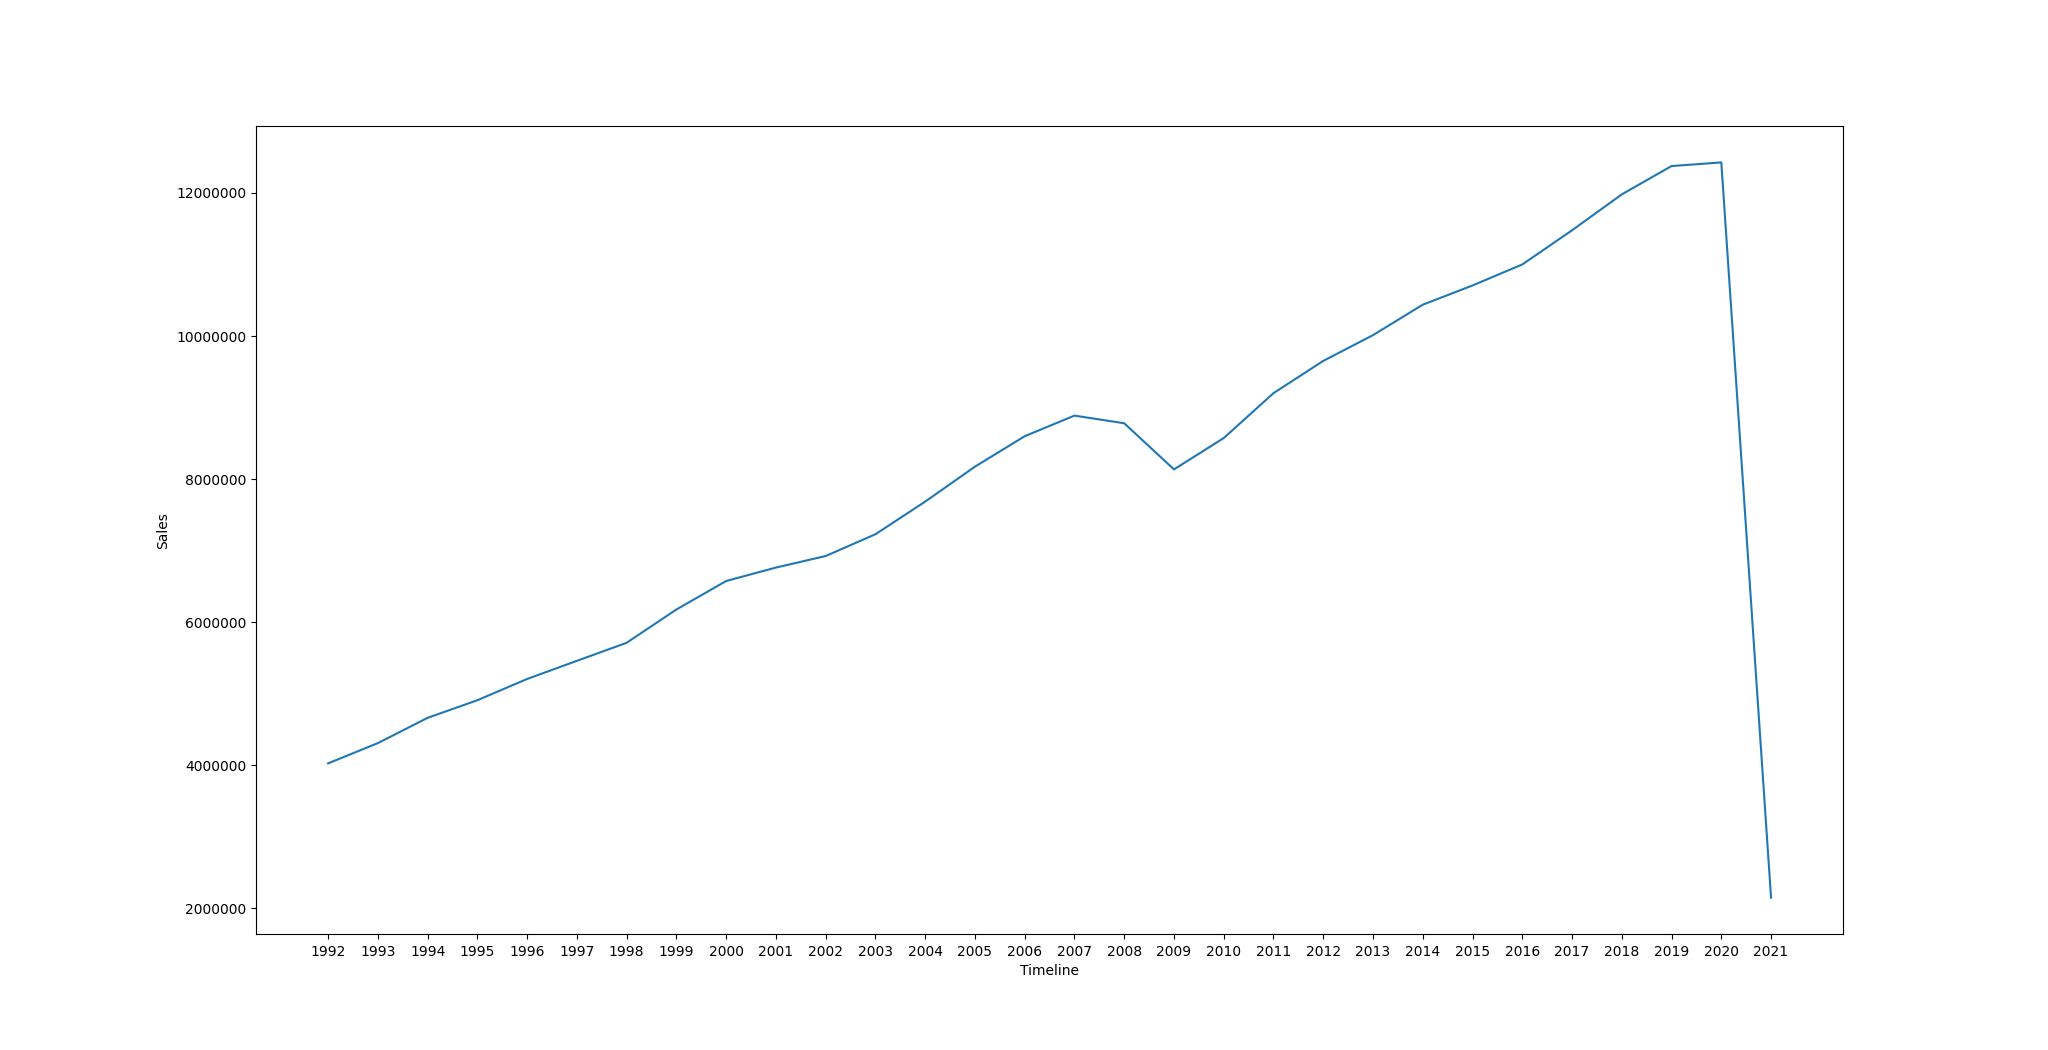



Below is the months of each year trend

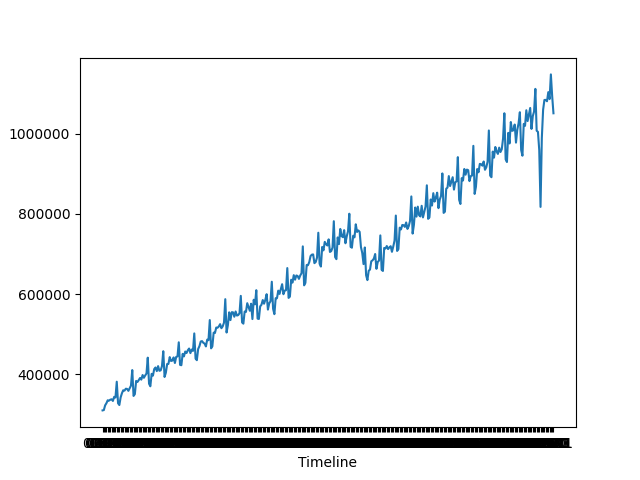

All above shared in file name 'trend_monthly_retails.py'

- When comparing businesses below: 
  + bookstores
  + sporting goods stores 
  + hobbies, toys, and games stores
  
- what is the highest trend of all of these options? Sproting goods has the highest uptrend and showed the largest downtrend, but the lowest was seen in Book stores.  
- Which one grew faster? Sproting goods showed higher growth than other buisnesses and it grew much faster. Meanwhile other buisnesses showed less of growth per years 
- Which one is higher? Sproting goods buisnesses are the highest

Graph figure to show the comparison using yearly data 
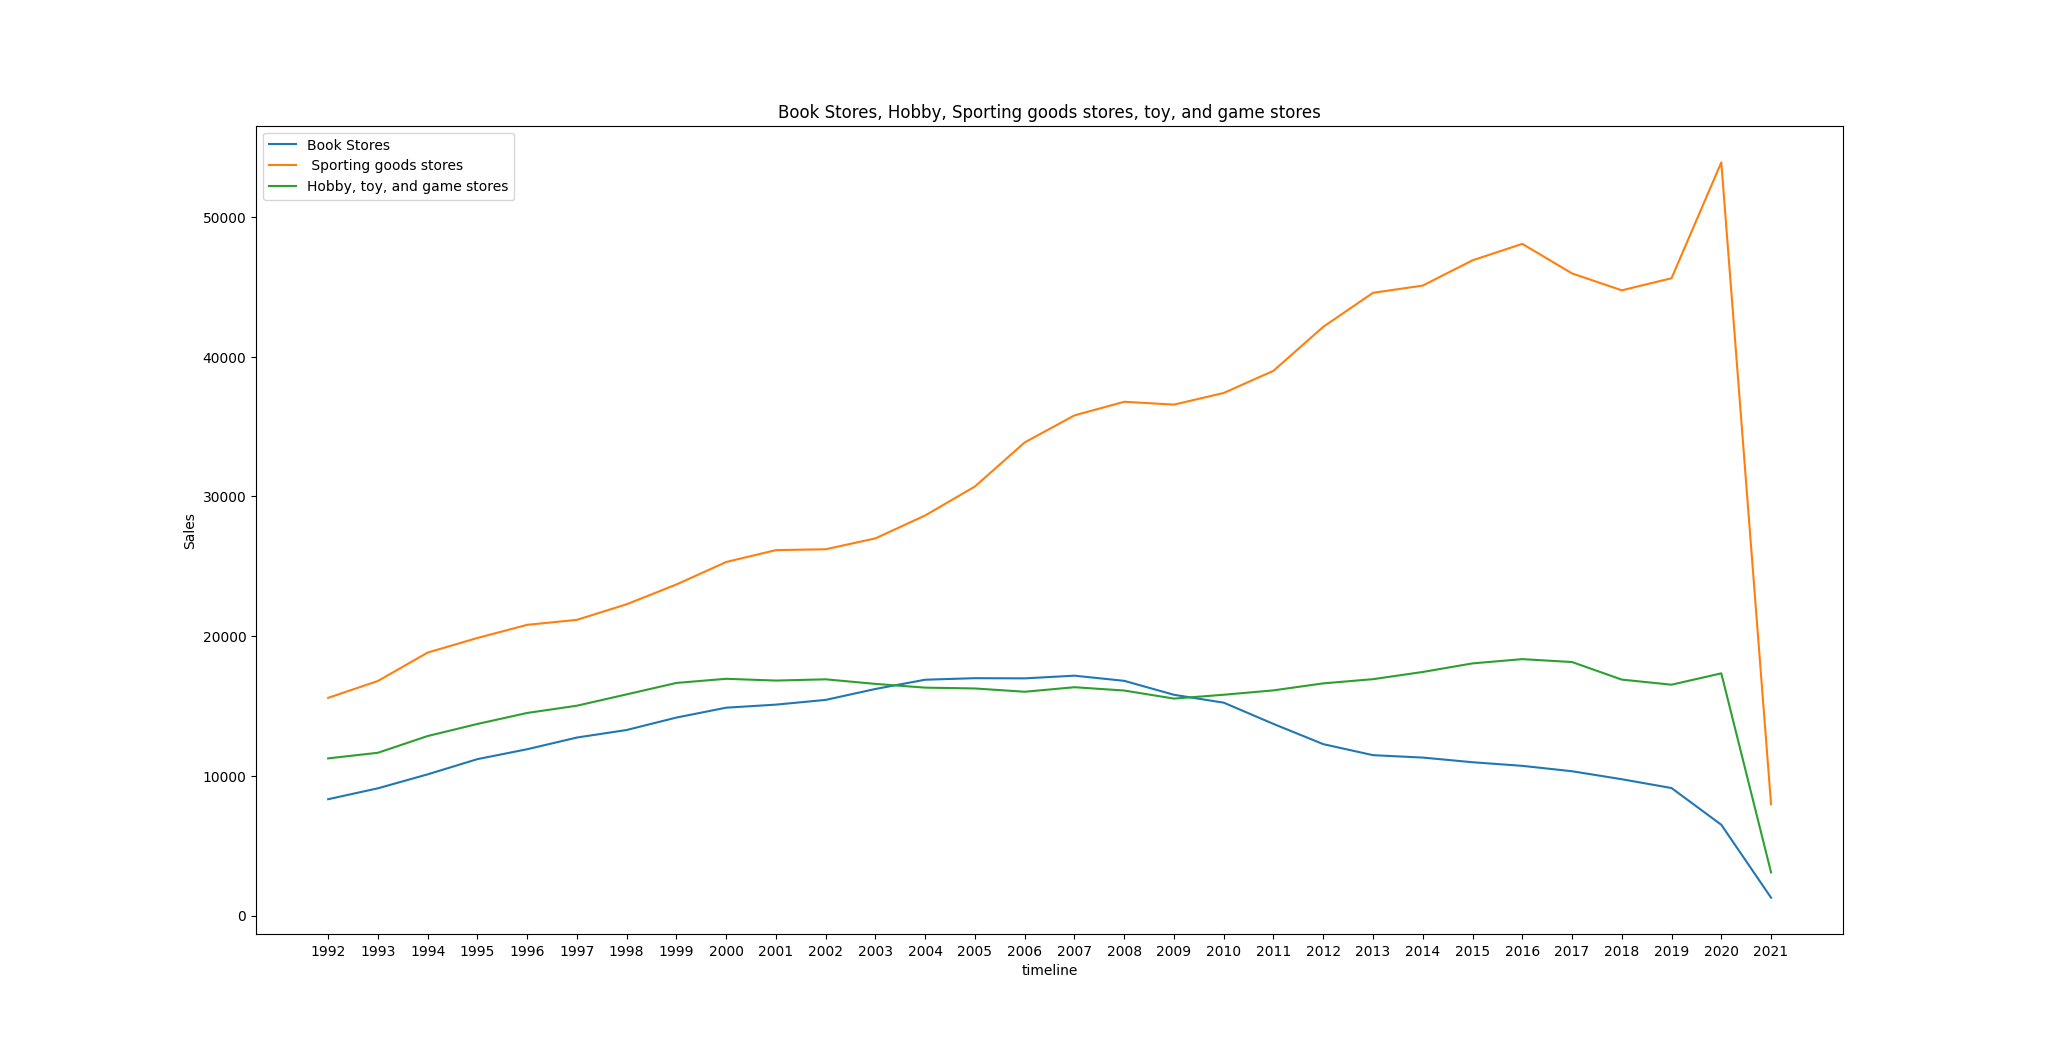



- Is there a seasonal pattern? 

Below comparison using monthly data per each year, showed a clearer seasonal patterns per each year, and it showed a clear seasonal change. 

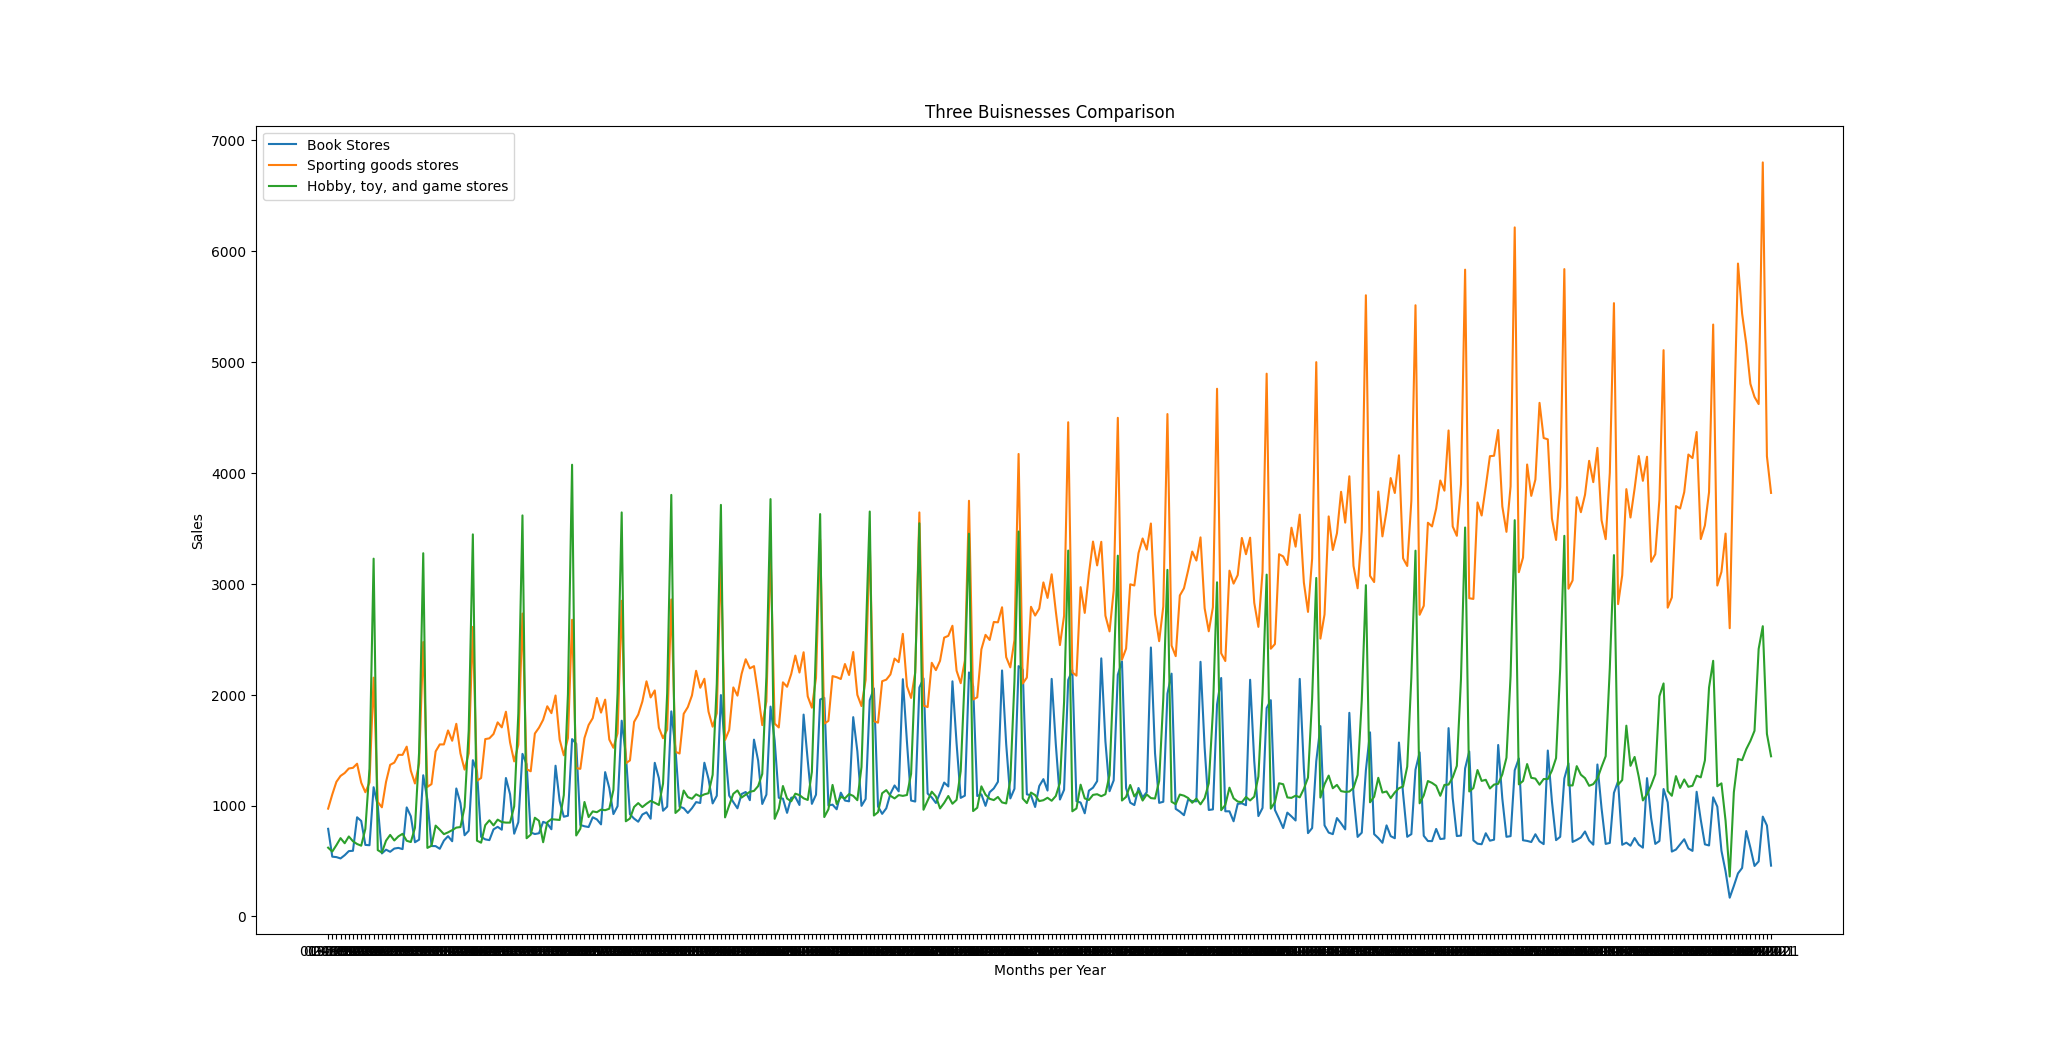



And below looking at each month details for all years, which shows a seasonal pattern in August(8) for an uptrend for book stores and sporting goods stores which could be related to summer times and the demand being higher for those buisnesses and Decmber(12) for all the buisness which likely to be related to chrismas times. 
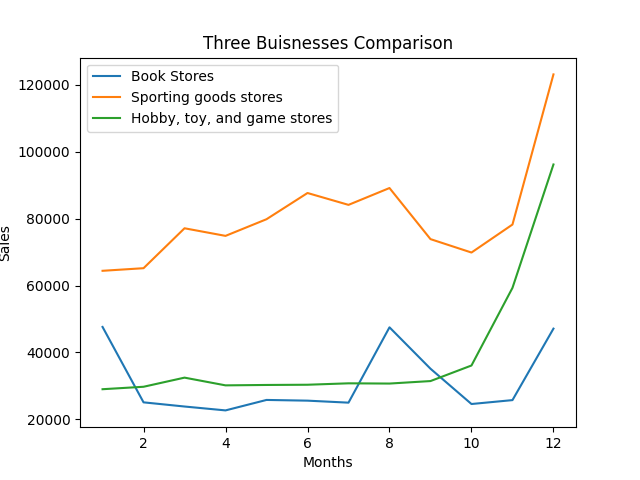


- Were there any changes in 2020? a clear downtrend happened in april 2020 for all of the three buisnessed, and it slowly started gaining an uptrend again with a noticable spike in sporting goods stores in June 2020.  

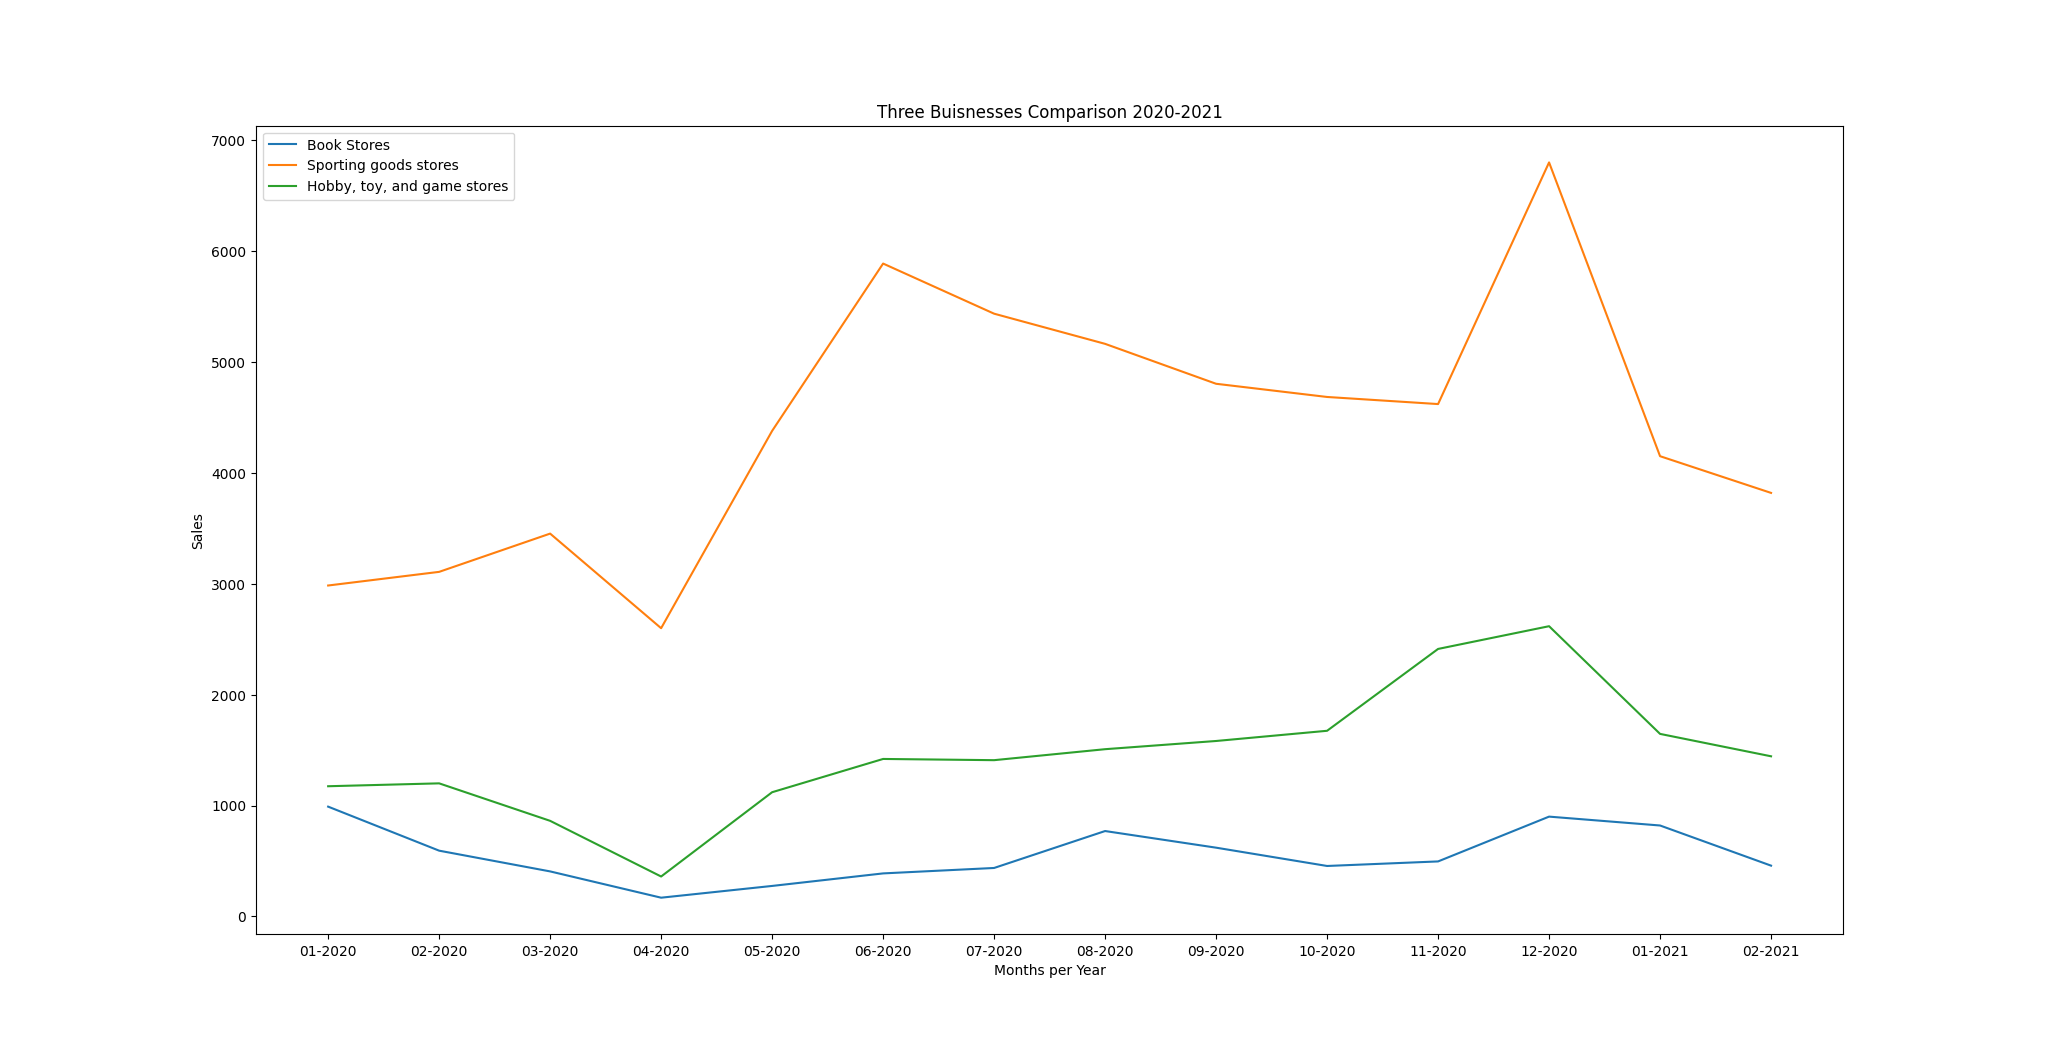

- Which is better, monthly or yearly? both are important aspects to show the trends through the years with yearly major events to be seen with the yearly details. However, for seasonal details the monthly are more important 

All above shared in file name 'comparison_three.py'

[Back to top](#Index)

### 3.4 Explore Percentage Change

- In economics, what is the percentage change and why is it considered an important measure to predict quantities like spending patterns?

The percentage change is used to calculate by what percentage a variable has changed over a time period. The percentage change is calculated by the formula below:

$$ Percentage change = \frac{(Current value - Previous value)}{Previous value × 100} $$



Percentage changes can be either increases or decreases. Represented as mathemticla calculation of the variation of changes as a percentage of its initial value to find the relative veriation. The importance of percantage chanmges is that it allows to evaluate how much things varied without paying attention to the actual amount by which they have veried. Thus, percentage changes are often used to measure performance and compare two or more variations, without giving any "unfair advantage".


- Consider the women's clothing and men's clothing businesses and their percentage change. 

  + How are these two businesses related? 
    - The percantage change showed an exagurated decrease from 2020 till 2021 for both women's clothing stores and Men's clothing stores.
    - Both showed relatively similar increases and decrease across the years except slightrly noticable differance in 1999, where men's clothing stores showed dcrease and women's clothing stores showe increase.
  + For each of the two businesses, what is the percentage of contribution to the whole and how does it change over time?
    - both have and avarage of ~10% increase contribution, as shown below. 
    - with about -80% dcrease contribution in 2020 - 2021
    
  
  Percentage change graph
  
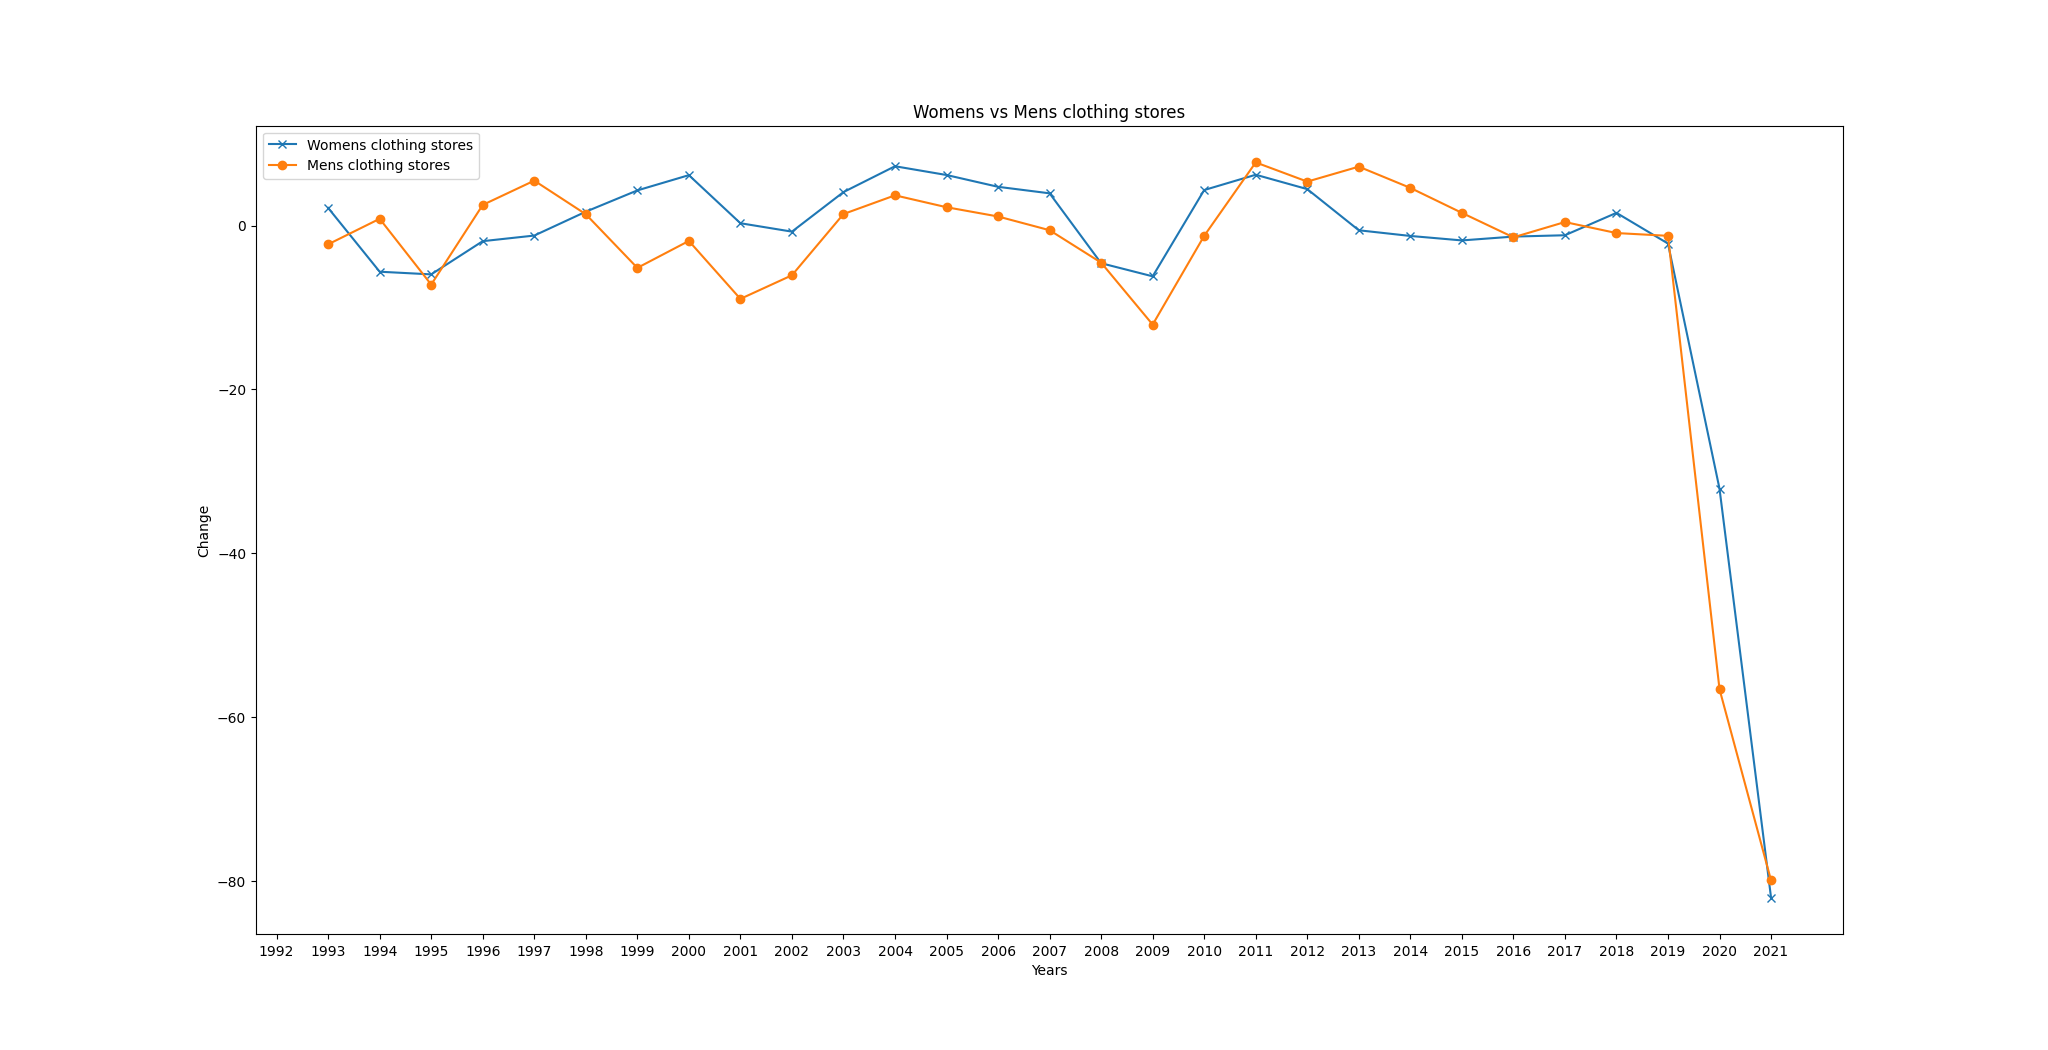

[Back to top](#Index)

### 3.5 Explore Rolling Time Windows


Describe which *queries* you wrote to explore the differences in trends between various categories in your data.

In your submission, make sure to answer the following:

- In economics, what is the rolling time window and why is it considered an important measure to predict quantities like spending patterns?
   - Rolling time window is to used to perform operations on subsets of your data, by chjoosing a period of time and pertforming the analysis on it. In this excercise, I used a rolling window to show the lowest to highest sales for a period of time. 


- Consider at least two businesses of your own from the MRTS data. Which *queries* did you write to analyze and produce graphs of rolling time windows for the chosen categories? 
   - As for this excercise I selected, two buisnesses within period of time year 2008 till year 2009:
     1) Grocery Stores in year 2008-2009 with below query:
     * SELECT DATE_FORMAT(Date,'%m-%Y') , Sum(Sales) OVER (PARTITION BY Buisness ORDER BY Sales) As Sales_total From CSales
       WHERE    Buisness in ('Grocery stores') and DATE_FORMAT(Date,'%Y') in (2008,2009);*

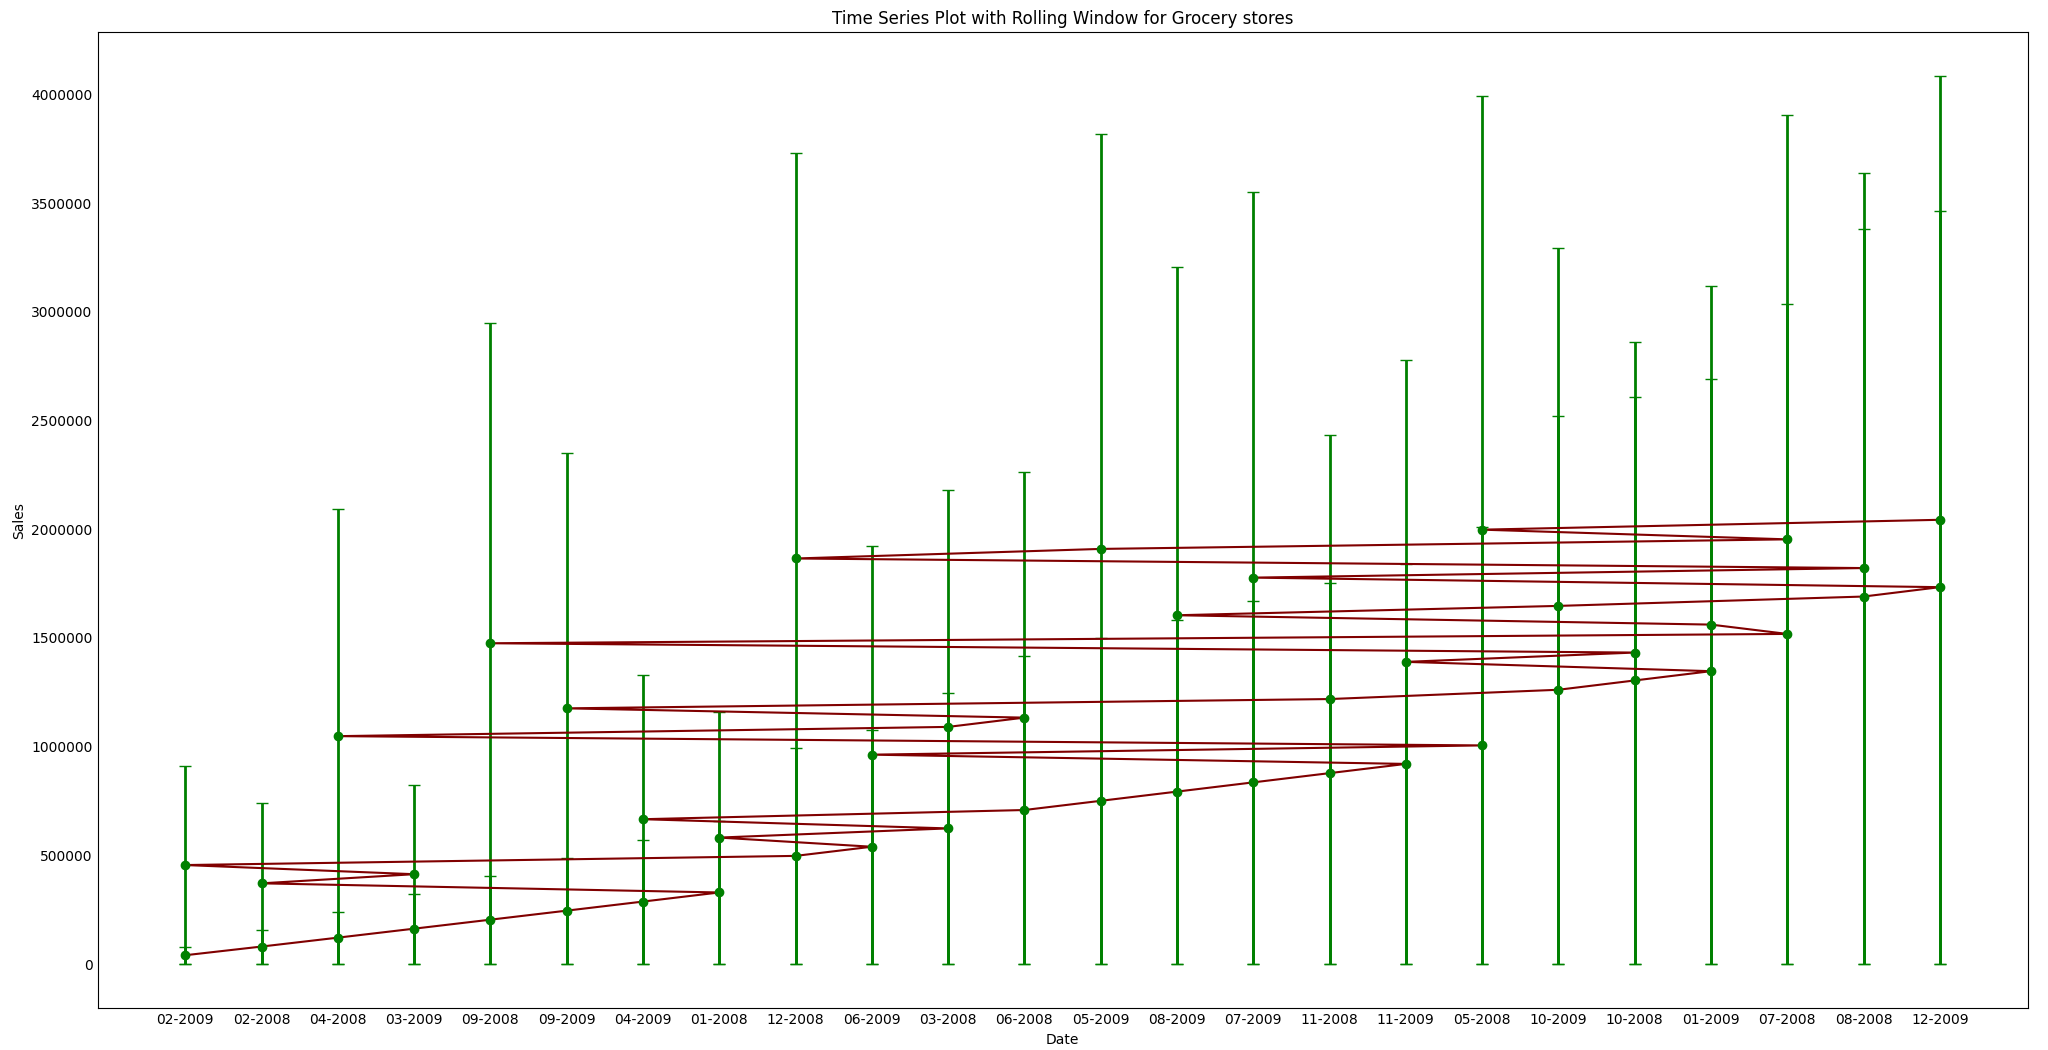

       
     2) Clothins stores in year 2008-2009 with below query: 
     * SELECT DATE_FORMAT(Date,'%m-%Y') , Sum(Sales) OVER (PARTITION BY Buisness ORDER BY Sales) 
       As Sales_total From CSales WHERE Buisness in ('Clothing stores') and DATE_FORMAT(Date,'%Y') in (2008,2009);*

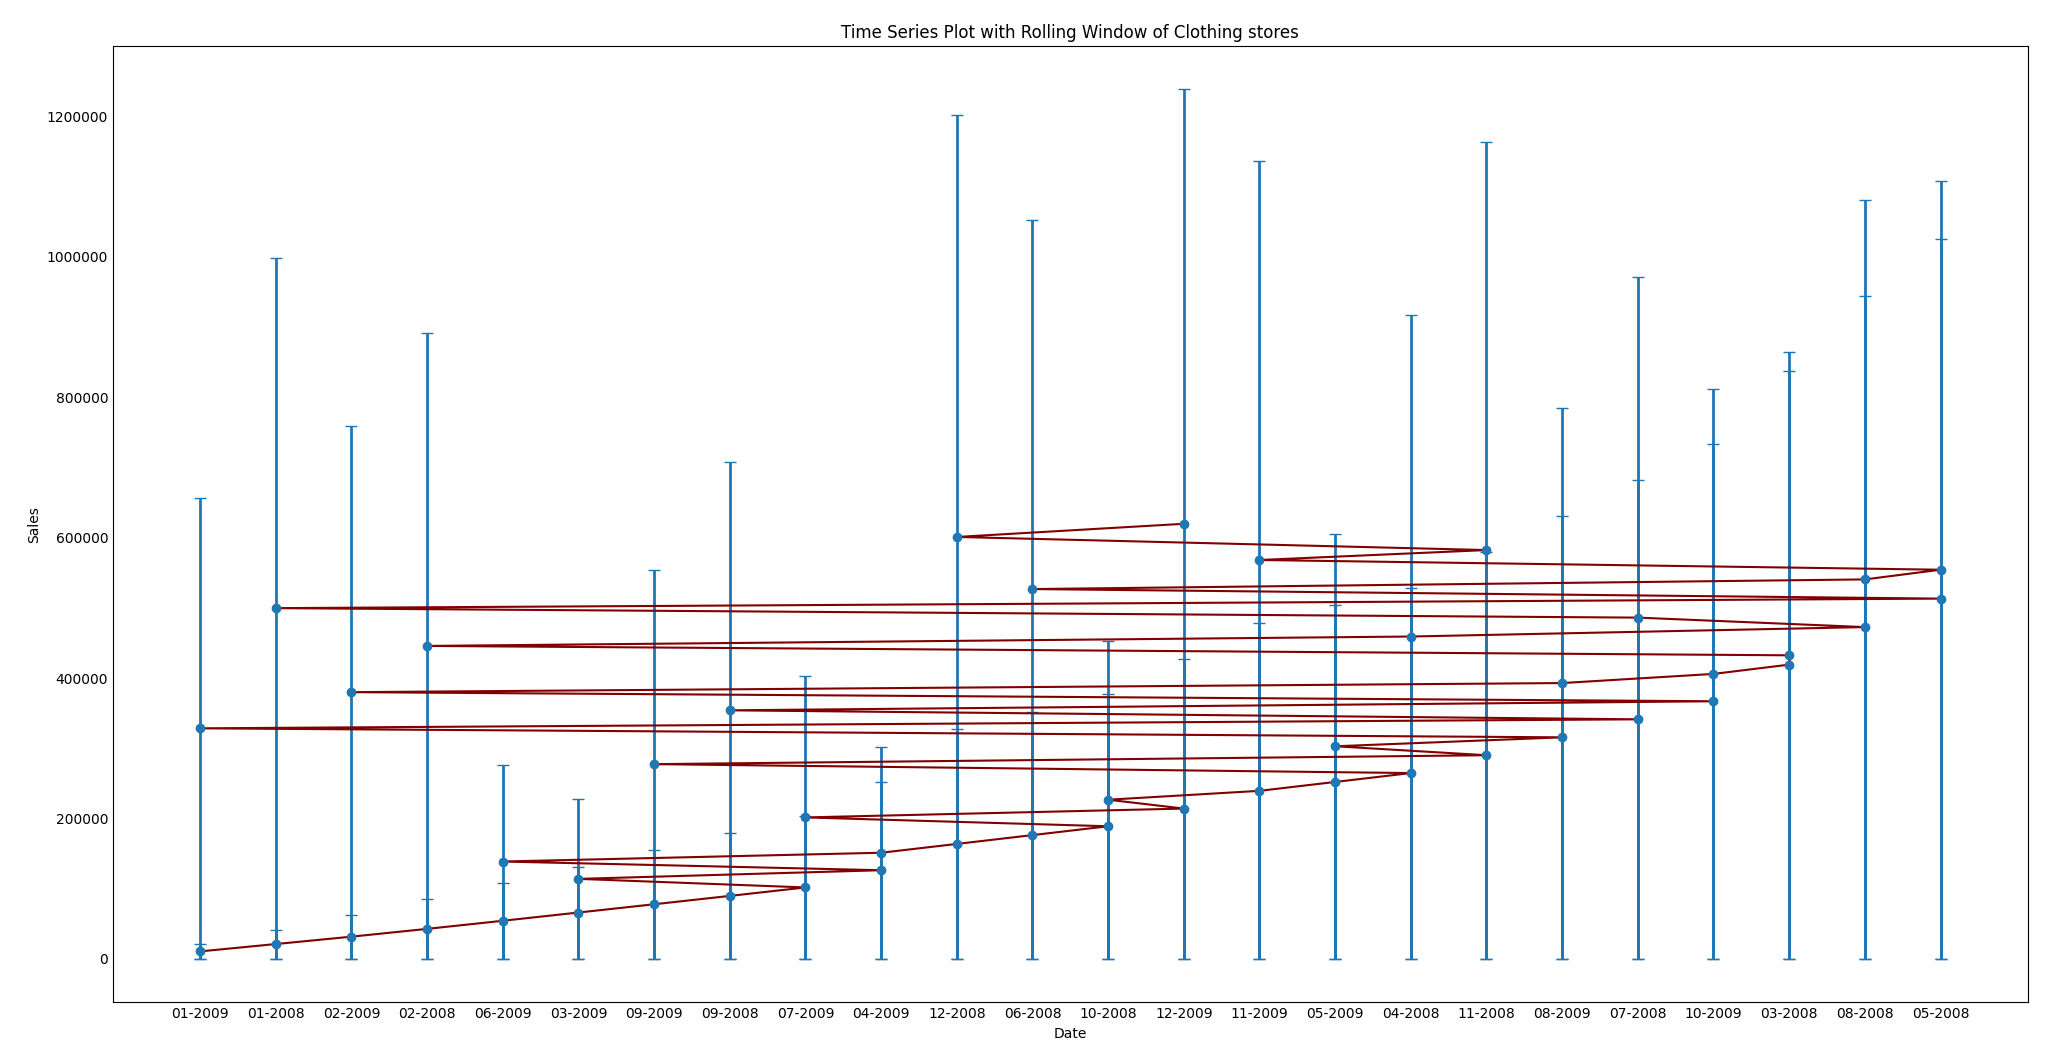

In above the graphs I used to represent it, choosing an error bar to show the total sales and using a plot on top to represent the rolling window.



[Back to top](#Index)

## Conclusion

In conculsion, it clear that there are some suistainable buisnesses and other that has been decreasing other periods on times. Such as book stores showed continous decrease across the years. Meanwhile, Retail and food services sales, total keeps showing growth in sales.  

As well its noticable that some events can be impactful for certain buisnesses and its showed in the seasonal details changes. 



[Back to top](#Index
)
## References

References used to complete this project.

- Kuo, Brian. "Building an Automated Data Pipeline for Retail Trade Survey Data". NYC DATA SCIENCE ACADEMY. 2023. https://nycdatascience.com/blog/student-works/building-an-automated-data-pipeline-for-retail-trade-survey-data/

- Census goverment. "Monthly Retail Trade Annual Revision Reports". 
2024 Annual Revision Report (January 1992 - March 2024), 2024. https://www.census.gov/retail/mrts/historic_releases.html

